# [課題] Mental Health in Tech Survey

URL：  https://www.kaggle.com/osmi/mental-health-in-tech-survey

<div style="text-align: right;">
作成者: 藤原 涼
</div>

# 1. データセットの確認

## 各項目の意味を理解する
 
参考)
    https://www.kaggle.com/osmi/mental-health-in-tech-survey

* Content
    This dataset contains the following data:

| カラム名 | 英語 | 日本語 |
|:-|:-|:-|
| Timestamp | | 時間 |
| Age | | 年齢 |
| Gender | | 性別 |
| Country | | 国 |
| state | If you live in the United States, which state or territory do you live in? |  アメリカに住んでいる場合のどの州や地域に住んでいるのか |
| self_employed | Are you self-employed? | 自営業かどうか |
| family_history | Do you have a family history of mental illness? |  家族の中で精神病になったことがあるかどうか |
| treatment | Have you sought treatment for a mental health condition? | 精神病の治療を受けたことがあるか(目的変数)  |
| work_interfere | If you have a mental health condition, do you feel that it interferes with your work? |  精神病を持っている場合、仕事の妨害になると感じるか |
| no_employees | How many employees does your company or organization have? | 会社組織の従業員の数 |
| remote_work | Do you work remotely (outside of an office) at least 50% of the time? | 少なくとも50%はリモートやオフィス外で働いているか |
| tech_company | Is your employer primarily a tech company/organization? | 雇用主が、Tech Company/Organizationかどうか |
| benefits | Does your employer provide mental health benefits? | 雇用主が、精神保険給付を提供しているか |
| care_options | Do you know the options for mental health care your employer provides? | 雇用主が提供する精神保健医療の選択肢を知っていますか？ |
| wellness_program | Has your employer ever discussed mental health as part of an employee wellness program? |  あなたの雇用主は従業員の健康プログラムの一環としてメンタルヘルスについて議論しましたか？ |
| seek_help | Does your employer provide resources to learn more about mental health issues and how to seek help? | あなたの雇用主は、メンタルヘルスの問題や助けを求める方法についての詳細を学ぶためのリソースを提供していますか？ |
| anonymity | Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? | メンタルヘルスや薬物乱用の治療リソースを利用することを選択した場合は、匿名性が保護されていますか？ |
| leave | How easy is it for you to take medical leave for a mental health condition? | あなたが精神的健康状態のために休暇をとることはいかがですか？ |
| mental_health_consequence | Do you think that discussing a mental health issue with your employer would have negative consequences? | あなたの雇用主との精神保健問題について話し合うことは悪影響を及ぼすと思いますか？ |
| phys_health_consequence | Do you think that discussing a physical health issue with your employer would have negative consequences? | あなたの雇用主との健康上の問題について議論することは、否定的な結果をもたらすと思いますか？ |
| coworkers | Would you be willing to discuss a mental health issue with your coworkers? | あなたの同僚と精神衛生上の問題について話し合いたいですか？|
| supervisor | Would you be willing to discuss a mental health issue with your direct supervisor(s)? | あなたはあなたの直属の上司と精神衛生上の問題について話し合いたいですか？ |
| mental_health_interview | Would you bring up a mental health issue with a potential employer in an interview? | インタビューで潜在的な雇用主との精神衛生問題を提起しますか？ |
| phys_health_interview | Would you bring up a physical health issue with a potential employer in an interview? |  インタビューで潜在的な雇用主との身体的健康問題を提起しますか？ |
| mental_vs_physical | Do you feel that your employer takes mental health as seriously as physical health? | あなたの雇用主は精神的健康を肉体的健康と同じくらい重視していると感じますか？ |
| obs_consequence | Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? |  あなたの職場に精神的健康状態の同僚のために否定的な結果を聞いたり、観察しましたか？ |
| comments | Any additional notes or comments | 追加のメモやコメント |
 
 
## データの内容を確認する

In [1]:
%matplotlib inline 
#グラフをnotebook内に描画させるための設定
import numpy as np
import pandas as pd
from IPython.display import display
from dateutil.parser import parse
import matplotlib.pyplot as plt

import seaborn as sns
import graphviz
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [2]:
df_data = pd.read_csv("../1_data/survey.csv")
print(df_data.columns)
print("データの個数と変数の数を確認")
display(df_data.shape)
print("データの中身を確認")
display(df_data.head())
display(df_data.tail())
print("データの型などの情報を確認")
display(df_data.info())

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')
データの個数と変数の数を確認


(1259, 27)

データの中身を確認


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN
1258,2016-02-01 23:04:31,25,Male,United States,IL,No,Yes,Yes,Sometimes,26-100,...,Don't know,Maybe,No,Some of them,No,No,No,Don't know,No,NaN


データの型などの情報を確認
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        125

None

TODO: 確認項目として
カラム名、データの種類(Yes/Noなどのパターン)、件数、型などがわかれば良さそうだが


## 目的変数について

- 精神的健康状態の治療を受けたことがあるかどうかのフラグである、「<span style="font-size:120%; color:red;">treatment</span>」が目的変数


# 2. 欠損値の確認を行う

数値データではない形式が多いため、欠損値の場合なぜ欠損値になっているのかを調査し、適切な値に補完するか削除するかを検討する

In [3]:
# 各カラム毎に欠損値の数の合計を計算する
df_missing = pd.DataFrame(df_data.isnull().sum(), columns=["num of missing"])

# 全データに締める欠損データの数を割合で確認するためのデータを準備する
total_count = df_data.shape[0] # 全データ数を取得する
df_missing_rate = df_missing[(df_missing["num of missing"] > 0)] /total_count*100 # 欠損値の数を全データ数で割ることで割合を求める

print("欠損データの割合を表示。（※ 全体のデータ件数は、", total_count, "件）")
pd.concat([df_missing[(df_missing["num of missing"] > 0)], df_missing_rate], axis=1)

欠損データの割合を表示。（※ 全体のデータ件数は、 1259 件）


,num of missing,num of missing
state,515,40.905481
self_employed,18,1.429706
work_interfere,264,20.969023
comments,1095,86.973789


## 欠損値「state」の確認

stateはアメリカ合衆国に住んでいる場合州を指定するために用いられる。<br>
そのため、アメリカに住んでいない人のデータは、欠損値となっている。

In [4]:
print("アメリカに住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] == "United States"].head())
print("アメリカ以外に住んでいる人のデータ")
display(df_data[["Country", "state"]][df_data["Country"] != "United States"].head())

# アメリカ以外に住んでいる人が欠損値となることがわかったので、"no_data"という文字列で置換するとともに、
df_data = df_data.fillna({"state":"no_data"})
print("欠損値をno_dataの文字列に置き換え")
df_data[["Country", "state"]].head()

アメリカに住んでいる人のデータ


,Country,state
0,United States,IL
1,United States,IN
4,United States,TX
5,United States,TN
6,United States,MI


アメリカ以外に住んでいる人のデータ


,Country,state
2,Canada,NaN
3,United Kingdom,NaN
7,Canada,NaN
9,Canada,NaN
11,Bulgaria,NaN


欠損値をno_dataの文字列に置き換え


,Country,state
0,United States,IL
1,United States,IN
2,Canada,no_data
3,United Kingdom,no_data
4,United States,TX


## 欠損値「self_employed」の確認
self_employedは、自営業かどうかの判定のフラグに用いられている。<br>
なお欠損値は、18件と全体の1.4%程度である。

In [5]:
print("self_employedが欠損値の場合の目的変数との関係性")
self_employed_null = df_data[df_data["self_employed"].isnull()]

# nullのデータが無い場合、エラーとなってしまうので念のためチェックを入れておく
if self_employed_null.empty == False:
    self_employed_null = self_employed_null.fillna({"self_employed":"no_data"})
    df_no_employees = pd.crosstab(index=self_employed_null["treatment"], columns=self_employed_null["self_employed"], margins=True)
    display(df_no_employees)

# 自営業と従業員規模に焦点をあててクロス集計を実施
print("自営業と従業員の規模の関係性を確認")
df_no_employees = pd.crosstab(index=df_data["self_employed"], columns=df_data["no_employees"], margins=True)
display(df_no_employees)

self_employedが欠損値の場合の目的変数との関係性


self_employed,no_data,All
treatment,,
No,9,9
Yes,9,9
All,18,18


自営業と従業員の規模の関係性を確認


no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,All
self_employed,,,,,,,
No,62,168,276,59,253,277,1095
Yes,98,5,8,0,31,4,146
All,160,173,284,59,284,281,1241


上記より、self_employedが欠損値の場合でも、目的変数の割合は半々であり、
また従業員の規模から自営業かどうかを保管できないか関係性を見てみたが、判断することは出来ないので、
未記入を「no_data」という文字列で保管しておく。

In [6]:
# self_employedの未記入データを「no-data」という文字列で補完する
df_data = df_data.fillna({"self_employed":"no_data"})

## 欠損値「work_interfere」の確認

精神病が仕事の妨害になると感じるかという情報である。<br>
精神病の人が積極的に回答する項目なのかなとも感じたので、念のため欠損データと精神病の有無がどう関係しているのかをチェックしておく

In [7]:
# TODO: 前回の宿題の内容を後ほど反映する

In [8]:
# work_interfere の未記入データを「no-data」という文字列で補完する
df_data = df_data.fillna({"work_interfere":"no-data"})

## 欠損値「comment」の確認

コメントに関しては、欠損値ではなく未記入となりため、欠損値には空文字を登録しておくことにする。

TODO: コメントのデータは、どのように扱えばよいのだろうか

In [9]:
df_data = df_data.fillna({"comments":""})

## 欠損値の対応まとめ

- state: 約41%
   - 州を入力する項目であるため、アメリカに住んでいない場合は欠損値となる
   - 欠損値の場合は、「no_data」という文字列で補完した
- self_employed: 約1%
   - 自営業かどうかを示す値
   - 欠損値の補完候補として、従業員数を指標にしようとしたが完全に識別することは出来ず
   - 欠損値の場合は、「no_data」という文字列で補完した
- work_interfere: 約21%
   - 精神病が仕事の妨害になると感じるかという情報
   - 264件の欠損値のうち、260件が精神病でない人の回答となっていた。
      - 何か傾向がありそうな感じはするが...
   - 一旦欠損値の場合は、「no_data」という文字列で補完した
- comments: 約87%
   - 未記入のデータがほとんどである
   - 欠損値の場合は、空文字で補完した

# 3. 名寄せ、外れ値の確認

まずは、各カラムのデータの中身を確認する

In [10]:
## データ入力に偏りがあるかどうかは、ユニークなデータを見て確認することにする
## その際には、value_counts()を利用することで確認することが出来る
for column in df_data.columns.values:
    if column in ["Timestamp", "comments"]:
        continue
    print(column)
    # TODO: もう少しみやすくしたい...
    display(df_data[column].value_counts())

Age


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 20              6
 48              6
 50              6
 51              5
 56              4
 49              4
 57              3
 54              3
 55              3
 47              2
 60              2
 11              1
 8               1
 5               1
 99999999999     1
-1726            1
 53              1
 58              1
 61              1
 62              1
 65              1
 72              1
 329             1
-29              1
-1          

Gender


Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female (trans)                                      2
Man                                                 2
Female                                              2
Cis Male                                            2
woman                                               1
Femake                                              1
Trans-female                                        1
queer/she/they              

Country


United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Italy                       7
Sweden                      7
Switzerland                 7
South Africa                6
Brazil                      6
Belgium                     6
Israel                      5
Bulgaria                    4
Singapore                   4
Mexico                      3
Austria                     3
Russia                      3
Finland                     3
Greece                      2
Croatia                     2
Colombia                    2
Denmark                     2
Portugal                    2
Thailand                    1
Japan                       1
Norway                      1
Bosnia and Herzegovina      1
Bahamas, T

state


no_data    515
CA         138
WA          70
NY          57
TN          45
TX          44
OH          30
PA          29
IL          29
OR          29
IN          27
MI          22
MN          21
MA          20
FL          15
NC          14
VA          14
WI          12
GA          12
MO          12
UT          11
CO           9
MD           8
AL           8
AZ           7
OK           6
NJ           6
SC           5
KY           5
IA           4
CT           4
DC           4
SD           3
NH           3
NV           3
KS           3
VT           3
NM           2
NE           2
WY           2
ID           1
WV           1
LA           1
ME           1
RI           1
MS           1
Name: state, dtype: int64

self_employed


No         1095
Yes         146
no_data      18
Name: self_employed, dtype: int64

family_history


No     767
Yes    492
Name: family_history, dtype: int64

treatment


Yes    637
No     622
Name: treatment, dtype: int64

work_interfere


Sometimes    465
no-data      264
Never        213
Rarely       173
Often        144
Name: work_interfere, dtype: int64

no_employees


6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

remote_work


No     883
Yes    376
Name: remote_work, dtype: int64

tech_company


Yes    1031
No      228
Name: tech_company, dtype: int64

benefits


Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64

care_options


No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

wellness_program


No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

seek_help


No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

anonymity


Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64

leave


Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

mental_health_consequence


No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64

phys_health_consequence


No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

coworkers


Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64

supervisor


Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

mental_health_interview


No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64

phys_health_interview


Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

mental_vs_physical


Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64

obs_consequence


No     1075
Yes     184
Name: obs_consequence, dtype: int64

上記より、「Age」と「Gender」について対応が必要

- Age
   - 99999999999 や -1726 などの変なデータがあることが確認できるので外れ値として除外する必要がありそう
- Gender
   - 性別についても様々な形式で入力されているので名寄せが必要
   
その他の変数については問題ない認識

## Ageの外れ値の除外

年齢の入力状況を確認し、「0歳以下」と「100歳以上」のデータについては外れ値として該当の行を削除する

Age,-1726,-29,-1,5,8,11,18,19,20,21,...,57,58,60,61,62,65,72,329,99999999999,All
treatment,,,,,,,,,,,,,,,,,,,,,
No,0,1,0,1,0,1,4,5,4,8,...,1,0,1,0,1,1,0,0,0,622
Yes,1,0,1,0,1,0,3,4,2,8,...,2,1,1,1,0,0,1,1,1,637
All,1,1,1,1,1,1,7,9,6,16,...,3,1,2,1,1,1,1,1,1,1259


外れ値削除後の年齢データの分布の確認


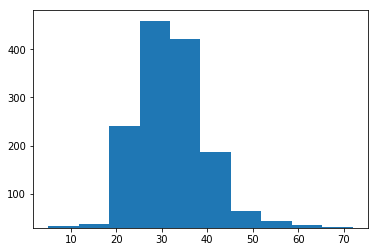

In [11]:
df_c = pd.crosstab(index=df_data["treatment"], columns=df_data["Age"], margins=True)
display(df_c) 

# 外れ値を削除
df_data = df_data[((df_data["Age"]  >= 0)  & (df_data["Age"]  < 100))]

# 外れ値削除後のデータの確認
print("外れ値削除後の年齢データの分布の確認")
plt.hist(df_data["Age"], bottom=30, bins=10)
plt.show()

## Gender の名寄せ

男性: Male
女性: Female
不明: unknown
とする。

In [12]:
### Genderに登録されている種類を表示する
#df_data['Gender'].value_counts().index.tolist()
display(df_data['Gender'].value_counts().index)

## 登録されている種類を確認しながら値の変換を行う
df_data["mapGender"] = df_data["Gender"].map({
    "Male":"Male",
    "male":"Male",
    "M": "Male",
    "m":"Male",
    "Make": "Male",
    "Male ": "Male",
    "Man": "Male",
    "Cis Male": "Male",
    "Mail": "Male",
    "Malr": "Male",
    "Mal": "Male",
    "Cis Man": "Male",
    "maile": "Male",
    "cis male": "Male",
    "Male (CIS)": "Male",
    "Male-ish": "Male",
    "msle": "Male",
    "Female":"Female",
    "female": "Female",
    "F": "Female",
    "f": "Female",
    "Woman": "Female",
    "Female ": "Female",
    "Female (trans)": "Female",
    "woman": "Female",
    "Cis Female": "Female",
    "Trans-female": "Female",
    "Female (cis)": "Female",
    "femail": "Female",
    "Femake" :"Female",
    "Trans woman": "Female",
    "queer": "Female",
    "Genderqueer": "Female",
    "cis-female/femme": "Female",
    "A little about you": "unknown",
    "All": "unknown",
    "Guy (-ish) ^_^":"unknown",
    "queer/she/they": "unknown",
    "Androgyne": "unknown",
    "fluid": "unknown",
    "male leaning androgynous": "unknown",
    "non-binary": "unknown",
    "ostensibly male, unsure what that really means": "unknown",
    "p": "unknown",
    "something kinda male?": "unknown",
    "Neuter": "unknown",
    "Agender": "unknown",
    "Enby": "unknown",
    "Nah": "unknown",
})
df_data['mapGender'].value_counts()

Index(['Male', 'male', 'Female', 'M', 'female', 'F', 'm', 'f', 'Make', 'Male ',
       'Woman', 'Man', 'Female ', 'Female (trans)', 'Cis Male', 'Nah',
       'Femake', 'A little about you', 'queer/she/they', 'woman', 'cis male',
       'something kinda male?', 'Trans woman', 'Enby', 'Androgyne',
       'Trans-female', 'Male-ish', 'Mail', 'Genderqueer', 'femail',
       'Female (cis)', 'fluid',
       'ostensibly male, unsure what that really means', 'msle', 'non-binary',
       'cis-female/femme', 'Neuter', 'Agender', 'male leaning androgynous',
       'Cis Female', 'Cis Man', 'maile', 'Male (CIS)', 'Guy (-ish) ^_^', 'Mal',
       'Malr', 'queer'],
      dtype='object')

Male       988
Female     253
unknown     13
Name: mapGender, dtype: int64

## 名寄せ・外れ値の対応まとめ

- Age
   - 外れ値を除外
   - 0歳 ~ 100歳までのデータを対象とした
- Gender
   - 男性: Male
   - 女性: Female
   - 不明: unknown
      - 13件の性別不明データ有り

# 4. 目的変数と説明変数の関係
ここから目的変数と説明変数の関係性を表すグラフを記載していく

TODO: 前回の宿題でまとめた内容を後ほど反映する

# 5. 分類アルゴリズムの検討

TODO: 前回の宿題でまとめた内容を後ほど反映する


前回の講義を受けて下記の３種類のアルゴリズムを採用してみる。<br><br>
・決定木<br>
・ランダムフォレスト<br>
・アダブースト<br>


## 5.1 データの前処理

今回利用しない項目の削除や数値への変換、ダミー変数の生成などを行う

In [13]:
# 使わないデータを削除
df_data_c = df_data.drop("Timestamp", axis=1).drop("Gender", axis=1).drop("comments", axis=1)

# 値の整形を行う
for column in df_data_c.columns:
    # YES/NOのデータの場合は、No:0, Yes:1 で置換する
    if column in ["treatment", "family_history", "remote_work", "tech_company", "obs_consequence"]:
        df_data_c[column] = df_data_c[column].map({"No": 0, "Yes": 1})

# 目的変数を一番左の列に移動させておく(計算しやすいようにするため)
col = df_data_c.columns.tolist() # 列名のリスト
col.remove('treatment')    # 先頭に移動させるため一旦リストから削除
col.insert(0, "treatment") # index:0の前にtreatmentを追加する
df_data_c = df_data_c.loc[:,col]

# ダミー変数の生成
df_data_c = pd.get_dummies(df_data_c)

display(df_data_c.head())
display(df_data_c.shape)

,treatment,Age,family_history,remote_work,tech_company,obs_consequence,Country_Australia,Country_Austria,"Country_Bahamas, The",Country_Belgium,...,mental_health_interview_Yes,phys_health_interview_Maybe,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_Don't know,mental_vs_physical_No,mental_vs_physical_Yes,mapGender_Female,mapGender_Male,mapGender_unknown
0,1,37,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,44,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,0,32,0,0,1,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
3,1,31,1,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,31,0,1,1,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0


(1254, 157)

上記より、目的変数である「treatment」を、156の説明変数の中から有効な変数を選択しモデルを構築する。

なお、treatmentも数値に変換されてしまっているが、<br>
1: Yes => 精神疾患病<br>
0: No  => 精神疾患病ではない<br>
という意味となる。

# 7. 決定木(DecisionTreeClassifier)

In [14]:
# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

## 7.1 最適なパラメータの探索

決定木で設定可能な最適なパラメータをグリッドサーチを利用して検索する

In [15]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {
    # 不純度の評価方法
    ## gini : ジニ係数、 entropy : 情報量
    "criterion": ["gini", "entropy"],
    # サンプルを枝に分割する数の際の枝の数の最小値
    "min_samples_split": [2, 5, 10, 20, 40],
    # 1つのサンプルが属する葉の数の最小値
    "min_samples_leaf": [1, 5, 10, 20],
    "max_depth": [None, 3, 5, 10]
}

clf = GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
                param_grid = params,   
                scoring="accuracy", 
                n_jobs = -1)
clf.fit(X, y)

print(clf.best_estimator_)
print(clf.best_params_)


/Users/megadreams14/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/megadreams14/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
CPU times: user 668 ms, sys: 84.9 ms, total: 753 ms
Wall time: 1.86 s


上記の結果より
- criterion: "gini"
- min_samples_split: 2
- min_samples_leaf: 5
- max_depth: 3
のパラメータを利用する。

## 7.2 決定木を描画する

In [16]:
X_train = X
y_train = y

# グリッドサーチの結果より
param_criterion = "gini"
param_min_samples_split = 2
param_min_samples_leaf = 5
param_max_depth = 3

clf = DecisionTreeClassifier(
    random_state=1234,
    criterion=param_criterion,
    min_samples_leaf=param_min_samples_leaf,
    min_samples_split=param_min_samples_split
)
clf.fit(X_train, y_train)
        
clf = DecisionTreeClassifier(criterion=param_criterion, max_depth=param_max_depth, min_samples_split=param_min_samples_split, min_samples_leaf=param_min_samples_leaf, random_state=1234)
clf = clf.fit(X_train, y_train)

print('訓練のデータに対する識別率：{0:.2f}%'.format(clf.score(X_train, y_train) * 100))
#print(clf.predict(X_test)) #予測したい場合


訓練のデータに対する識別率：83.01%


各説明変数の重要度を確認


,xxx
work_interfere_no-data,0.517410
work_interfere_Never,0.429250
family_history,0.043581
mental_health_consequence_Maybe,0.008427
Country_Netherlands,0.000687


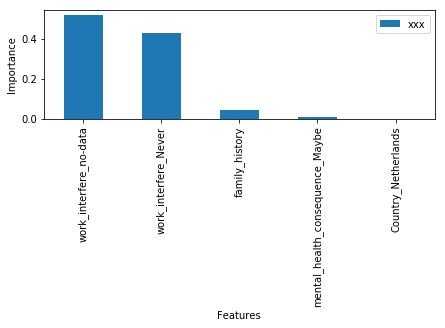

In [19]:
print("各説明変数の重要度を確認")
#print(clf.feature_importances_)

df_result_score = pd.DataFrame(clf.feature_importances_, index=X_columns, columns=["xxx"])
df_sort = df_result_score.sort_values(by=["xxx"], ascending=False).head()
display(df_sort)
df_sort.plot.bar(figsize=(7,2))
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

上記より、全てのデータセットを対象にした場合、
主に下記の説明変数が重要な模様

- work_interfere_no-data
- work_interfere_Never	

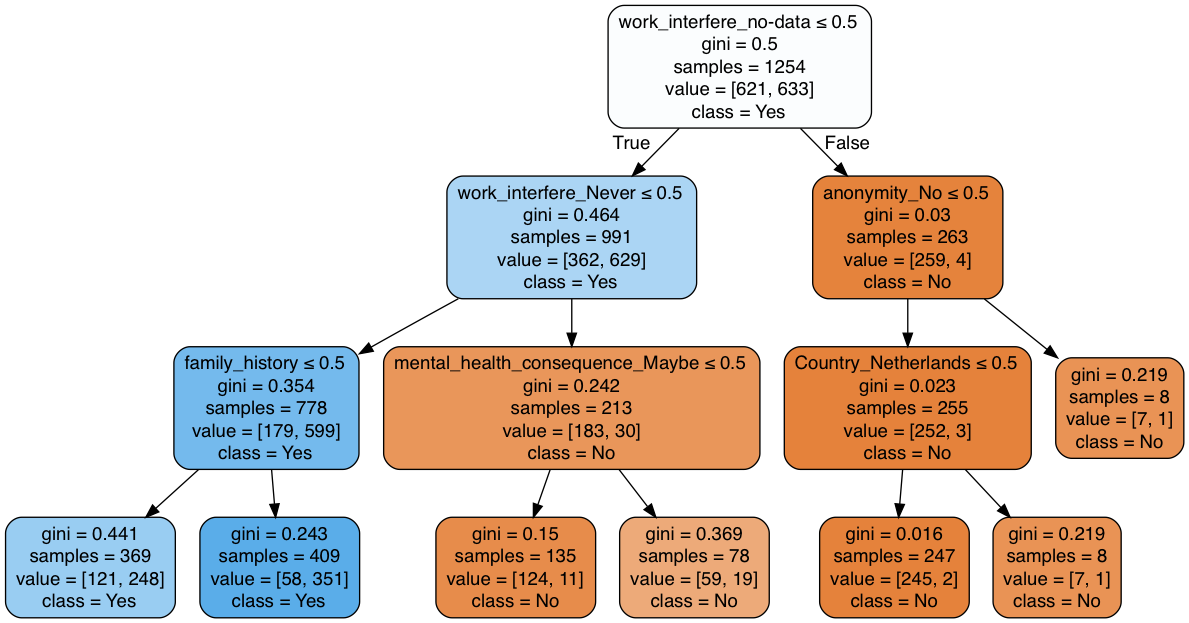

In [20]:
from sklearn.tree import export_graphviz

# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(clf, out_file=dot_data,  
                     feature_names=X_columns,  
                     class_names=["No","Yes"],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## 7.3 交差検証の実施

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report


def cross_validation(X, y, X_columns):
    # グリッドサーチの結果より
    param_criterion = "gini"
    param_min_samples_split = 2
    param_min_samples_leaf = 5
    param_max_depth = 3


    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, y)

    df_result = pd.DataFrame()
    df_result_score = pd.DataFrame()

    index = 0
    for train_index, test_index in kf.split(X, y):
        index+=1

    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = DecisionTreeClassifier(
            random_state=1234,
            criterion=param_criterion,
            max_depth=param_max_depth,
            min_samples_leaf=param_min_samples_leaf,
            min_samples_split=param_min_samples_split
        )
        clf.fit(X_train, y_train)
        
        # 検証データに対する score と 重要な説明変数を保存する
        df = pd.DataFrame(clf.feature_importances_, index=X_columns, columns=[index])
        df_result_score = pd.concat([df_result_score, df], axis=1)

        y_pred = clf.predict(X_test)
        df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)
    return df_result["y_test"], df_result["y_pred"], df_result_score

y_test, y_pred, df_result_score = cross_validation(X, y, X_columns)

## 7.4 説明変数の重要度を確認

交差検証毎の説明変数の重要度を確認してみる。

決定木を利用した交差検証毎の各変数の重要度


,1
work_interfere_no-data,0.512261
work_interfere_Never,0.430903
care_options_Yes,0.046131
Age,0.008847


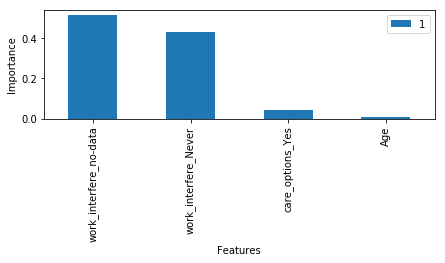

,2
work_interfere_no-data,0.502046
work_interfere_Never,0.439669
family_history,0.043707
mental_health_consequence_Maybe,0.012969


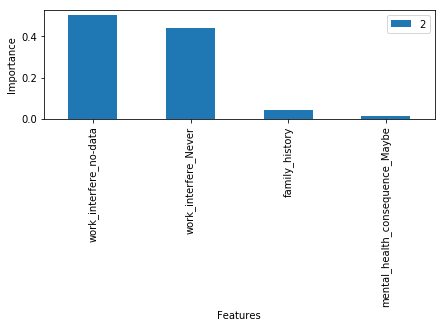

,3
work_interfere_no-data,0.498688
work_interfere_Never,0.449186
family_history,0.041846
mental_health_consequence_Maybe,0.007881
Country_Netherlands,0.001236


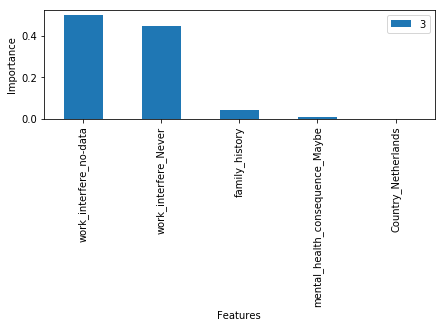

,4
work_interfere_no-data,0.538080
work_interfere_Never,0.400504
family_history,0.049967
Age,0.009780
anonymity_No,0.001155


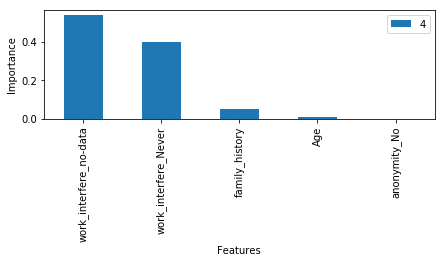

,5
work_interfere_no-data,0.526985
work_interfere_Never,0.416979
family_history,0.043908
mental_health_consequence_Maybe,0.010485
Country_Netherlands,0.001137


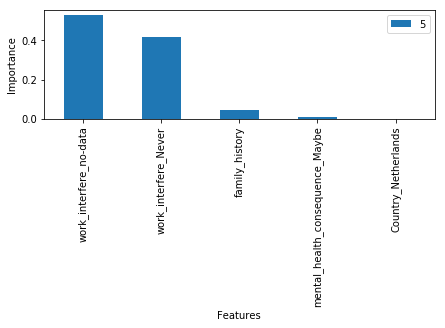

In [29]:
print("決定木を利用した交差検証毎の各変数の重要度")
for column in df_result_score.columns:
    df_sort = df_result_score[[column]][df_result_score[column] >= 0.001]    
    df_sort = df_sort.sort_values(by=[column], ascending=False).head()
    display(df_sort)
    df_sort.plot.bar(figsize=(7,2))
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()


それぞれの交差検証において

- work_interfere_no-data
- work_interfere_Never
- benefits_Yes

などの説明変数の重要度が高い模様

## 7.4 評価

混同行列を作成し、

- Accuracy(正解率)
- Recall(再現率)
- Precision(適合率)
- F1(再現率と適合率の調和平均)

を算出する

混同行列


予測,1,0
実際,,
1,599,34
0,179,442


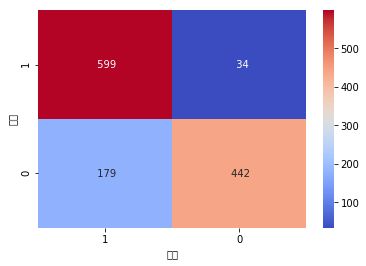

正解率：83.01%
再現率：94.63%
適合率：76.99%
F1：84.90%


In [30]:
print("混同行列")
df = pd.DataFrame({"実際":y_test,"予測":y_pred})  
df = df.groupby(["実際","予測"])[["予測"]].count()  
df.rename(columns={"予測":"num"},inplace=True)  
df.reset_index(inplace=True)  
df = df.pivot(index="実際",columns="予測",values="num")  
df.sort_index(ascending=False, inplace=True)  
df = df[[1,0]]

#df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), index=[1,0], columns=[1,0])
display(df)
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='4d')
plt.show()

### Accuracy(正解率)の算出方法
accuracy = accuracy_score(y_test, y_pred)
### Recall(再現率)の算出方法
recall = recall_score(y_test, y_pred)
### Precision(適合率)の算出方法
precision = precision_score(y_test, y_pred)
### F1(再現率と適合率の調和平均)の算出方法
f1 = f1_score(y_test,y_pred)

print('正解率：{0:.2f}%'.format(accuracy * 100))
print('再現率：{0:.2f}%'.format(recall * 100))
print('適合率：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

上記の結果より、正解率83.1%

# 8. ランダムフォレスト(RandomForestClassifier)

In [31]:
# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

## 8.1 最適なパラメータの探索

ランダムフォレストで設定可能な最適なパラメータをグリッドサーチを利用して検索する

In [32]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    # 作成する決定木の数
    "n_estimators":[10, 50, 100, 200],
    # 不純度の評価方法
    ## gini : ジニ係数、 entropy : 情報量
    "criterion": ["gini", "entropy"],
    # サンプルを枝に分割する数の際の枝の数の最小値
    "min_samples_split": [2, 5, 10, 20, 40],
    # 1つのサンプルが属する葉の数の最小値
    "min_samples_leaf": [1, 5, 10, 20],
    # 深さ
    "max_depth": [None, 3, 5, 10]
}

clf = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                param_grid = params,   
                scoring="accuracy", 
                n_jobs = -1)
clf.fit(X, y)

print(clf.best_estimator_)
print(clf.best_params_)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
CPU times: user 5.88 s, sys: 252 ms, total: 6.13 s
Wall time: 2min 15s


上記の結果より
- n_estimators: 50
- criterion: "entropy"
- min_samples_split: 20
- min_samples_leaf: 1
- max_depth: 10
のパラメータを利用する。

## 8.2 交差検証の実施

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

In [34]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report


def cross_validation(X, y, X_columns):
    # グリッドサーチの結果より
    param_n_estimators = 50
    param_criterion = "entropy"
    param_min_samples_split = 20
    param_min_samples_leaf = 1
    param_max_depth = 10

    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, y)

    df_result = pd.DataFrame()
    df_result_score = pd.DataFrame()

    index = 0
    for train_index, test_index in kf.split(X, y):
        index+=1

    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = RandomForestClassifier(
            random_state=1234,
            criterion=param_criterion,
            max_depth=param_max_depth,
            min_samples_leaf=param_min_samples_leaf,
            min_samples_split=param_min_samples_split,
            n_estimators=param_n_estimators
        )
        clf.fit(X_train, y_train)
        
        # 検証データに対する score と 重要な説明変数を保存する
        df = pd.DataFrame(clf.feature_importances_, index=X_columns, columns=[index])
        df_result_score = pd.concat([df_result_score, df], axis=1)

        y_pred = clf.predict(X_test)
        df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)
    return df_result["y_test"], df_result["y_pred"], df_result_score

y_test, y_pred, df_result_score = cross_validation(X, y, X_columns)

## 8.3 説明変数の重要度を確認

交差検証毎の説明変数の重要度を確認してみる。

ランダムフォレストを利用した交差検証毎の各変数の重要度


,1
work_interfere_no-data,0.190860
work_interfere_Sometimes,0.114032
family_history,0.082513
work_interfere_Never,0.079526
work_interfere_Often,0.045159


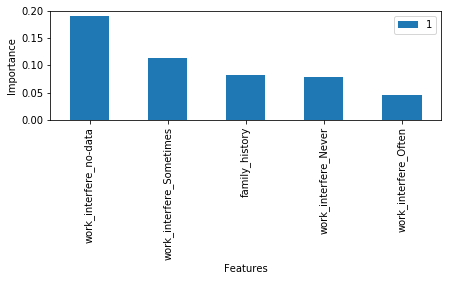

,2
work_interfere_no-data,0.167666
work_interfere_Sometimes,0.113365
family_history,0.088734
work_interfere_Never,0.066451
work_interfere_Often,0.049514


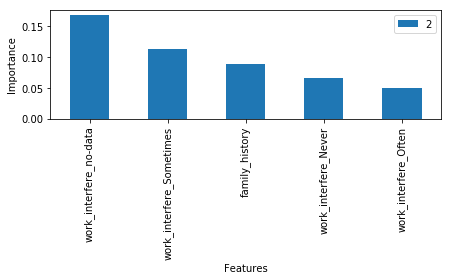

,3
work_interfere_no-data,0.228622
work_interfere_Never,0.092802
family_history,0.087705
work_interfere_Sometimes,0.070260
work_interfere_Often,0.038054


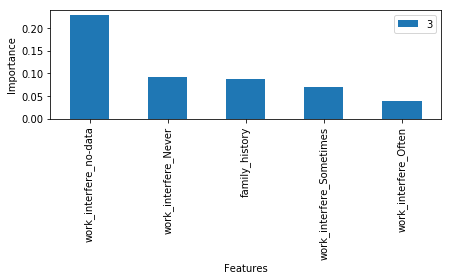

,4
work_interfere_no-data,0.212221
family_history,0.094062
work_interfere_Sometimes,0.071636
work_interfere_Never,0.070130
care_options_Yes,0.038662


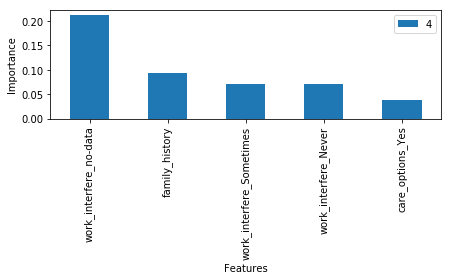

,5
work_interfere_no-data,0.210042
family_history,0.093702
work_interfere_Sometimes,0.090783
work_interfere_Never,0.073300
work_interfere_Often,0.042201


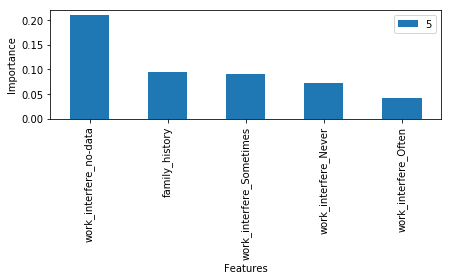

In [35]:
print("ランダムフォレストを利用した交差検証毎の各変数の重要度")

for column in df_result_score.columns:
    df_sort = df_result_score[[column]][df_result_score[column] >= 0.001]    
    df_sort = df_sort.sort_values(by=[column], ascending=False).head()
    display(df_sort)
    df_sort.plot.bar(figsize=(7,2))
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()
    

それぞれの決定木において、

- work_interfere_no-data
- work_interfere_Sometimes
- family_history
- work_interfere_Never
- work_interfere_Often

などの説明変数の重要度が高い模様

- care_options_Yes

も1つだけ入っていた

## 8.4 評価

混同行列を作成し、

- Accuracy(正解率)
- Recall(再現率)
- Precision(適合率)
- F1(再現率と適合率の調和平均)

を算出する

混同行列


予測,1,0
実際,,
1,566,67
0,155,466


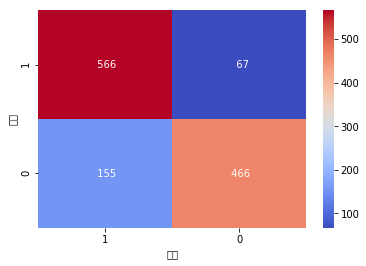

正解率：82.30%
再現率：89.42%
適合率：78.50%
F1：83.60%


In [36]:
print("混同行列")
df = pd.DataFrame({"実際":y_test,"予測":y_pred})  
df = df.groupby(["実際","予測"])[["予測"]].count()  
df.rename(columns={"予測":"num"},inplace=True)  
df.reset_index(inplace=True)  
df = df.pivot(index="実際",columns="予測",values="num")  
df.sort_index(ascending=False, inplace=True)  
df = df[[1,0]]

#df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), index=[1,0], columns=[1,0])
display(df)
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='4d')
plt.show()

### Accuracy(正解率)の算出方法
accuracy = accuracy_score(y_test, y_pred)
### Recall(再現率)の算出方法
recall = recall_score(y_test, y_pred)
### Precision(適合率)の算出方法
precision = precision_score(y_test, y_pred)
### F1(再現率と適合率の調和平均)の算出方法
f1 = f1_score(y_test,y_pred)

print('正解率：{0:.2f}%'.format(accuracy * 100))
print('再現率：{0:.2f}%'.format(recall * 100))
print('適合率：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

上記の結果より、正解率82.30%

# 9. アダブースト(AdaBoostClassifier)


In [37]:
# データを準備する
y = df_data_c["treatment"].values
X = df_data_c.iloc[:,1:].values
X_columns = df_data_c.iloc[:,1:].columns

## 9.1 最適なパラメータの探索

アダブーストで設定可能な最適なパラメータをグリッドサーチを利用して検索する

参考)
- [Using GridSearchCV with AdaBoost and DecisionTreeClassifier](https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier)

In [38]:
%%time
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    # 不純度の評価方法
    "base_estimator__criterion" : ["gini", "entropy"],
#    "base_estimator__splitter" :   ["best", "random"],
    # 作成する決定木の数
    "n_estimators":[10, 50, 100, 200],
    
    ## TODO: 以下の値を設定するとエラーになった。詳細は後ほど調べる。
    # サンプルを枝に分割する数の際の枝の数の最小値
#    "min_samples_split": [2, 5, 10, 20, 40],
    # 1つのサンプルが属する葉の数の最小値
#    "min_samples_leaf": [1, 5, 10, 20],
}

#DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "auto",max_depth = None)
DTC = DecisionTreeClassifier(random_state = 1234)
ABC = AdaBoostClassifier(base_estimator = DTC)
clf    =  GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')
clf.fit(X, y)


print(clf.best_estimator_)
print(clf.best_params_)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)
{'base_estimator__criterion': 'entropy', 'n_estimators': 100}
CPU times: user 305 ms, sys: 4.22 ms, total: 309 ms
Wall time: 310 ms


上記の結果より

- n_estimators: 100
- criterion: entropy
- min_samples_split: 2
- min_samples_leaf: 1

のパラメータを利用する。

## 9.2 交差検証の実施

グリッドサーチで算出したパラメータを利用して交差検証を実施する。

In [39]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report

def cross_validation(X, y, X_columns):
    # グリッドサーチの結果より
    param_n_estimators = 100
    param_criterion = "entropy"
    param_min_samples_split = 2
    param_min_samples_leaf = 1


    kf = KFold(n_splits=5, random_state=1234, shuffle=True)
    kf.get_n_splits(X, y)

    df_result = pd.DataFrame()
    df_result_score = pd.DataFrame()

    index = 0
    for train_index, test_index in kf.split(X, y):
        index+=1

    #    print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf = AdaBoostClassifier(
                    DecisionTreeClassifier(
#                        max_depth=2,
                        min_samples_leaf=param_min_samples_leaf,
                        min_samples_split=param_min_samples_split, 
                        random_state=1234,
                        criterion=param_criterion),
                   n_estimators=param_n_estimators, random_state=1234)
        clf.fit(X_train, y_train)
        
        # 検証データに対する score と 重要な説明変数を保存する
        df = pd.DataFrame(clf.feature_importances_, index=X_columns, columns=[index])
        df_result_score = pd.concat([df_result_score, df], axis=1)

        y_pred = clf.predict(X_test)
        df = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
        df_result = pd.concat([df_result, df], axis=0)
    return df_result["y_test"], df_result["y_pred"], df_result_score

y_test, y_pred, df_result_score = cross_validation(X, y, X_columns)

## 9.3 説明変数の重要度を確認

交差検証毎の説明変数の重要度を確認してみる。

アダブーストを利用した交差検証毎の各変数の重要度


,1
work_interfere_no-data,0.230383
work_interfere_Never,0.168307
Age,0.072035
care_options_Yes,0.030997
family_history,0.021436


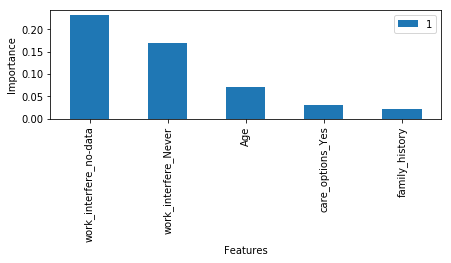

,2
work_interfere_no-data,0.216968
work_interfere_Never,0.166508
Age,0.063843
family_history,0.021240
remote_work,0.021046


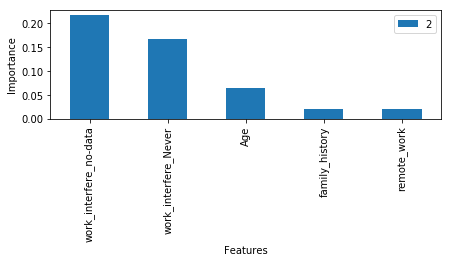

,3
work_interfere_no-data,0.218530
work_interfere_Never,0.172878
Age,0.046297
phys_health_interview_Maybe,0.023693
family_history,0.022911


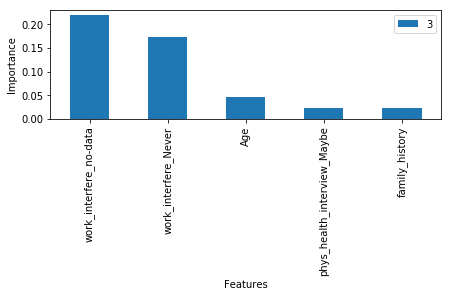

,4
work_interfere_no-data,0.237744
work_interfere_Never,0.156352
Age,0.072423
family_history,0.031203
benefits_Yes,0.029894


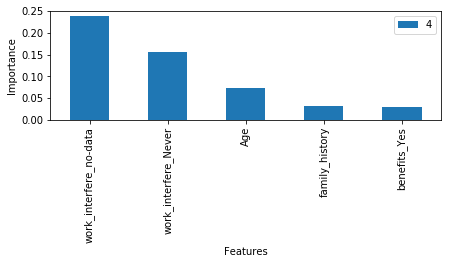

,5
work_interfere_no-data,0.235696
work_interfere_Never,0.165233
Age,0.043562
family_history,0.031254
care_options_Yes,0.021392


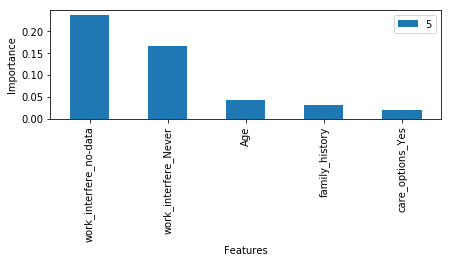

In [40]:
print("アダブーストを利用した交差検証毎の各変数の重要度")

for column in df_result_score.columns:
    df_sort = df_result_score[[column]][df_result_score[column] >= 0.001]    
    df_sort = df_sort.sort_values(by=[column], ascending=False).head()
    display(df_sort)
    df_sort.plot.bar(figsize=(7,2))
    plt.ylabel("Importance")
    plt.xlabel("Features")
    plt.show()
    

アダブーストを利用した場合、

- work_interfere_no-data
- work_interfere_Never
- Age

あたりの説明変数の重要度が高い模様

## 9.4 評価

混同行列を作成し、

- Accuracy(正解率)
- Recall(再現率)
- Precision(適合率)
- F1(再現率と適合率の調和平均)

を算出する

混同行列


予測,1,0
実際,,
1,487,146
0,155,466


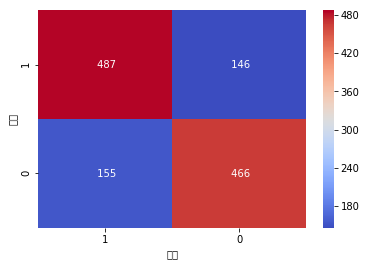

正解率：76.00%
再現率：76.94%
適合率：75.86%
F1：76.39%


In [41]:
print("混同行列")
df = pd.DataFrame({"実際":y_test,"予測":y_pred})  
df = df.groupby(["実際","予測"])[["予測"]].count()  
df.rename(columns={"予測":"num"},inplace=True)  
df.reset_index(inplace=True)  
df = df.pivot(index="実際",columns="予測",values="num")  
df.sort_index(ascending=False, inplace=True)  
df = df[[1,0]]

#df = pd.DataFrame(confusion_matrix(y_true=y_test, y_pred=y_pred), index=[1,0], columns=[1,0])
display(df)
sns.heatmap(df, annot=True, cmap='coolwarm', fmt='4d')
plt.show()

### Accuracy(正解率)の算出方法
accuracy = accuracy_score(y_test, y_pred)
### Recall(再現率)の算出方法
recall = recall_score(y_test, y_pred)
### Precision(適合率)の算出方法
precision = precision_score(y_test, y_pred)
### F1(再現率と適合率の調和平均)の算出方法
f1 = f1_score(y_test,y_pred)

print('正解率：{0:.2f}%'.format(accuracy * 100))
print('再現率：{0:.2f}%'.format(recall * 100))
print('適合率：{0:.2f}%'.format(precision * 100))
print('F1：{0:.2f}%'.format(f1 * 100))

上記の結果より、正解率76.0%

一旦ここまでのまとめ

- 評価

| アルゴリズム | 正解率 | 再現率 | 適合率 | F1 |
|:-:|-:|-:|-:|-:|
| 決定木 | 83.01% | 94.63% | 76.99% | 84.90% |
| ランダムフォレスト | 82.30% | 89.42% | 78.50% | 83.60% |
| アダブースト | 76.00% | 76.94% | 75.86% | 76.39% |

- 説明変数
   - work_interfere_no-data
   - work_interfere_Never
   - family_history
   - Age
   - work_interfere_Sometimes
   - work_interfere_Often
   - benefits_Yes
   
あたりが重要な模様